# Analiza podatkov

Podatki so zbrani iz spletne strani "https://en.wikipedia.org/wiki/List_of_days_of_the_year". 

Najprej so predstavljeni vsi podatki, zatem pa odgovarjamo na začetna vprašanja.

Za ogled podatkov rabiš pognati želena okenca s kodo.

### Tabela vseh oseb, njihovih nazivov, letnic rojstnega dne in smrti, ter če so ti podani tudi njihove življenjske dobe:
če je življenjska doba 404, pomeni da vsaj ena od vrednosti ni bila podana.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

pd.set_option("display.max_rows", 10)
OSEBE = pd.read_csv("dat_oseb.csv")
OSEBE

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenjska doba
0,1.Januar,Lucius Aelius,adopted son and intended successor of Hadrian,101.0,138.0,37
1,1.Januar,Telemachus,Christian monk and martyr,NaN,404.0,404
2,1.Januar,Odo I,Frankish king,860.0,898.0,38
3,1.Januar,Ramiro II,king of León and Galicia,NaN,951.0,404
4,1.Januar,William of Volpiano,Italian abbot,962.0,1031.0,69
...,...,...,...,...,...,...
117917,31.December,J. J. Arcega-Whiteside,Spanish-American football player,1996.0,NaN,404
117918,31.December,Cameron Carter-Vickers,English-American soccer player,1997.0,NaN,404
117919,31.December,Alycia Parks,American tennis player,2000.0,NaN,404
117920,31.December,Katie Volynets,American tennis player,2001.0,NaN,404


### Tabela vseh bitk ali vojn, ter datum kdaj so omenjene:

In [2]:
BITKE = pd.read_csv("dat_bitk.csv")
BITKE

,Ime bitke ali vojne,Datum
0,American Revolutionary War,1.Januar
1,American Civil War,1.Januar
2,Cristero War,1.Januar
3,World War II,1.Januar
4,Cold War,1.Januar
...,...,...
3443,Battle of Stones River,31.December
3444,World War II,31.December
3445,Cold War,31.December
3446,Benjamin Ward,31.December


## Koliko je podatkov za posamezen dan?
### Ali je očitno manj podatkov za 29. Februar?

Prva tabela prikazuje količino podatkov na posamezen dan razvrščeno po številu rojstev v naraščujočem zaporedju. 
Druga tabela pa po številu zabeleženih smrti. Na koncu pa je še izločen 29. Februar.

In [3]:
ST_PODATKOV = pd.read_csv("st_podatkov.csv")
ST_PODATKOV.sort_values(by ="Št smrti", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
58,28.Februar,26,0,158,35
310,6.November,22,4,113,49
131,11.Maj,34,3,102,52
48,18.Februar,50,11,139,52
157,6.Junij,38,9,102,53
...,...,...,...,...,...
272,29.September,54,11,243,137
250,7.September,71,12,269,138
32,2.Februar,51,9,331,153
63,4.Marc,75,11,432,165


In [4]:
ST_PODATKOV.sort_values(by ="Št rojstev", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
130,10.Maj,54,8,102,61
157,6.Junij,38,9,102,53
131,11.Maj,34,3,102,52
158,7.Junij,51,8,103,69
129,9.Maj,41,9,112,106
...,...,...,...,...,...
63,4.Marc,75,11,432,165
20,21.Januar,46,6,432,106
298,25.Oktober,42,8,440,122
324,20.November,48,11,506,134


In [5]:
filter = ST_PODATKOV["Datum"] == "29.Februar"
ST_PODATKOV[filter]

,Datum,Št dogodkov,Št bitk ali vojen,Št rojstev,Št smrti
59,29.Februar,39,6,127,64


29. Februar nima najmanjšega števila smrti, rojstev ali dogodkov (npr. 28. Februar), števila vseh pa so vseeno precej nizko po lestvici. Zato lahko sklepamo da ima kot najredkejši dan v letu nekaj manj podatkov, a to ni edino merilo.

### Ali obstaja kakšen trend za smrti ali rojstva skozi leto?

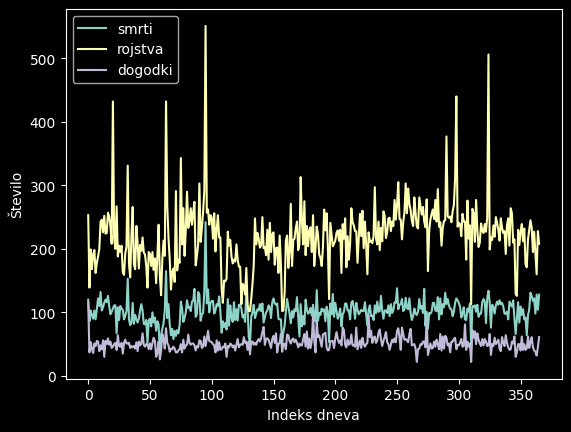

In [26]:
zbrani_podatki = pd.DataFrame({
   'smrti': ST_PODATKOV["Št smrti"],
   'rojstva': ST_PODATKOV["Št rojstev"],
   'dogodki': ST_PODATKOV["Št dogodkov"],
   })
lines = zbrani_podatki.plot.line(xlabel="Indeks dneva", ylabel="Število")

Pri rojstvu in smrti lahko opazimo manjši padec v začetku leta, ki pa se ne pojavi pri splošnih dogodkih, zato lahko sklepamo, da do tega ni prišlo samo zaradi pomanjkanja podatkov. prav tako lahko opazimo da se število rojstev poveča v drugi polovici leta.

## Kako širok je razpon podatkov?

In [7]:
razpon_rojstva = f"od {OSEBE["Rojstvo"].min()} do {OSEBE["Rojstvo"].max()}"
razpon_rojstva

'od -711.0 do 2021.0'

In [8]:
razpon_smrti = f"od {OSEBE["Smrt"].min()} do {OSEBE["Smrt"].max()}"
razpon_smrti

'od -1203.0 do 2024.0'

V Wikipediji je med rojstvi na specifičen dan najzgodnjejše 711 let pred našim štetjem, najkasnejše pa 3 leta nazaj.
Pri zabeleženi smrti pa to trenutno znaša od 1203 let pred našim štetjem, pa vse do letošnjega leta.

### Je naša informiranost skozi leta naraščala?

<Axes: >

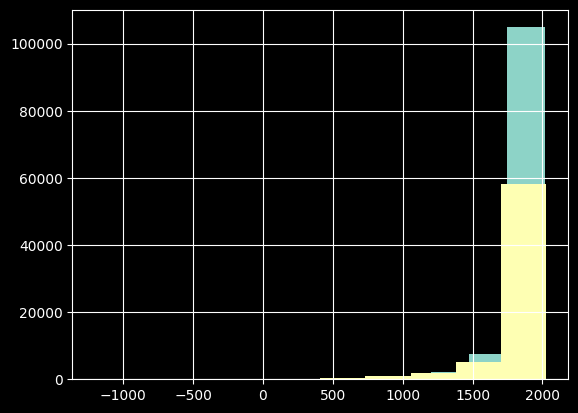

In [30]:
OSEBE["Rojstvo"].hist(log)
OSEBE["Smrt"].hist()

Tako pri rojstvu, kot smrti lahko opazimo, da število zabeleženih podatkov hitro narašča.

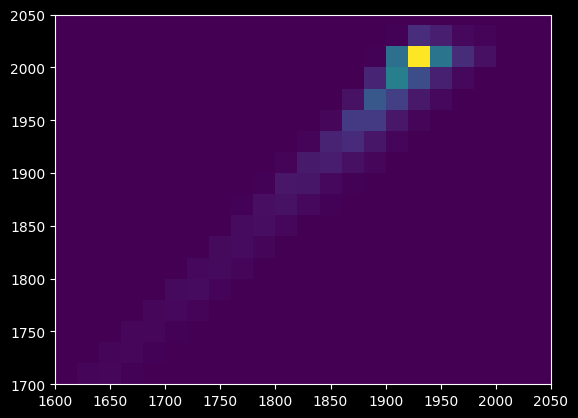

In [10]:
import pandas as pd
from grafi import komet_graf_za_informiranost

filter = OSEBE["Življenjska doba"] != 404
podana_zivljenjska_doba = OSEBE[filter]

x_os = pd.to_numeric(podana_zivljenjska_doba[f"Rojstvo"], downcast='signed')
y_os = pd.to_numeric(podana_zivljenjska_doba[f"Smrt"], downcast='signed')

komet_graf_za_informiranost(x_os, y_os)

Velika večina vseh rojstev in smrti je v okolici 2. tisočletja

### Ali je podaljšana življenjska doba očitna? 

Povprečna življenska doba zabeleženih oseb rojenih do (vključno z) letom 1800:

In [11]:
filter = podana_zivljenjska_doba["Rojstvo"] <= 1800
rojstvo_do_1800 = podana_zivljenjska_doba[filter]
rojstvo_do_1800["Življenjska doba"].mean()

60.07460431082478

Povprečna življenska doba zabeleženih oseb rojenih po letu 1800:

In [12]:
filter = podana_zivljenjska_doba["Rojstvo"] > 1800
rojstvo_po_1800 = podana_zivljenjska_doba[filter]
rojstvo_po_1800["Življenjska doba"].mean()

72.02274071389053

Da, življenjska doba, po 18. stoletju je očitno daljša kot Življenska doba do 19. stoletja.

### Kako je življenjska doba porazdeljena?

<Axes: xlabel='Življenjska doba', ylabel='Število oseb'>

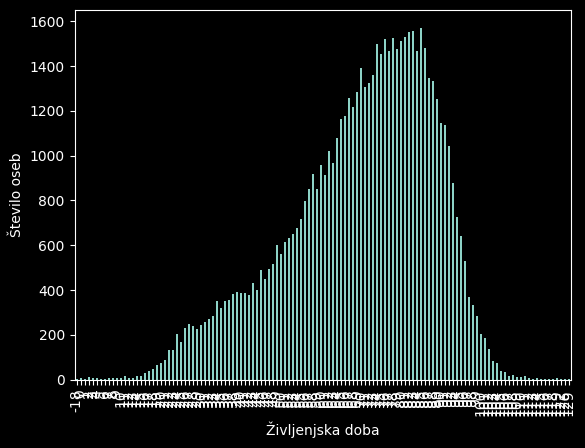

In [13]:
zivljenjska_d = podana_zivljenjska_doba.groupby(by="Življenjska doba").size()
zivljenjska_d.plot.bar(ylabel="Število oseb")

In [35]:
zivljenjska_d.mean()

524.1129032258065

### Kako so podatki porazdeljeni?

<Axes: >

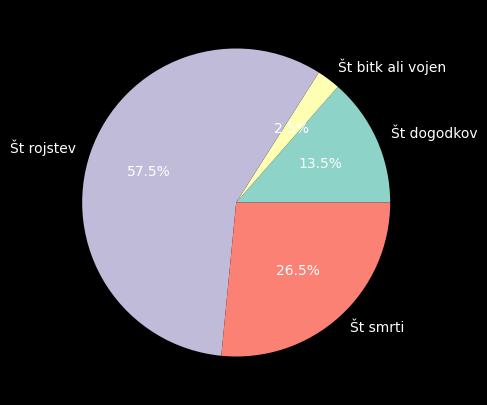

In [34]:
ST_PODATKOV.drop(columns=["Datum"]).sum().plot.pie(y="delež podatkov", figsize=(5, 5), autopct='%1.1f%%')

V procentih predstavljeni deleži podatkov. 
Število bitk ali vojen je 2.5%

## Koliko bitke vplivajo na ostale podatke?

Tabela dni, urejenih po naraščujočem številu bitk:

In [16]:
ST_PODATKOV.sort_values(by ="Št bitk ali vojen").drop(columns=["Št rojstev", "Št smrti"])

,Datum,Št dogodkov,Št bitk ali vojen
58,28.Februar,26,0
286,13.Oktober,40,1
55,25.Februar,30,2
13,14.Januar,30,2
131,11.Maj,34,3
...,...,...,...
260,17.September,66,20
296,23.Oktober,58,20
313,9.November,70,20
235,23.August,68,23


August je očitno posebaj priljubljen mesec za bitke ali vojne. Največ jih je omenjenih 5. Avgusta, in sicer:

In [17]:
filter = BITKE["Datum"] == "5.August"
BITKE[filter]

,Ime bitke ali vojne,Datum
1971,Battle of Maserfield,5.August
1972,Edward the Elder,5.August
1973,Battle of Alhandic,5.August
1974,Byzantine–Norman wars,5.August
1975,First Scottish War of Independence,5.August
...,...,...
1991,Cold War,5.August
1992,Vietnam War,5.August
1993,Indo-Pakistani War of 1965,5.August
1994,Vietnam War,5.August


### Ali bo zaradi bitk očiten narast smrti?

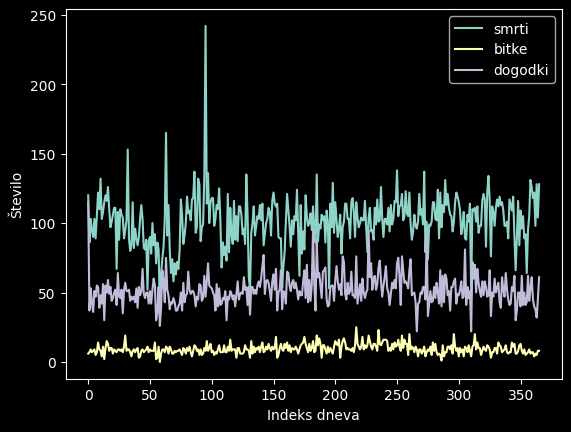

In [25]:
zbrani_podatki = pd.DataFrame({
   'smrti': ST_PODATKOV["Št smrti"],
   'bitke': ST_PODATKOV["Št bitk ali vojen"],
   'dogodki': ST_PODATKOV["Št dogodkov"]})
lines = zbrani_podatki.plot.line(xlabel="Indeks dneva", ylabel="Število")

In [24]:
ST_PODATKOV["Datum"]

0         1.Januar
1         2.Januar
2         3.Januar
3         4.Januar
4         5.Januar
          ...     
361    27.December
362    28.December
363    29.December
364    30.December
365    31.December
Name: Datum, Length: 366, dtype: object

Lahko opazimo nekaj ujemanj, med naraščanjem ali padanjem obeh grafov, ki pa se pojavijo tudi pri dogodkih.
Zato lahko sklepamo, da so ujemanja posledica pomanjkanja informacij, kot pa vpliva bitk na smrt.

## Zaključek

Podatkov je veliko, vendar niso vsi pravilni... še posebej na Wikipediji.


In [19]:
razpon_dobe = f"od {podana_zivljenjska_doba["Življenjska doba"].min()} do {podana_zivljenjska_doba["Življenjska doba"].max()}"
razpon_dobe

'od -18 do 129'

In [20]:
podana_zivljenjska_doba.sort_values(by ="Življenjska doba", ascending=False)

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenjska doba
103085,17.November,Gazi Evrenos,Ottoman general,1288.0,1417.0,129
31414,9.April,Jimmu,emperor of Japan,-711.0,-585.0,126
15894,21.Februar,Jeanne Calment,"French super-centenarian, oldest verified pers...",1875.0,1997.0,122
66543,4.August,Jeanne Calment,French super-centenarian; holds records for th...,1875.0,1997.0,122
84144,24.September,Sarah Knauss,"American super-centenarian, oldest verified Am...",1880.0,1999.0,119
...,...,...,...,...,...,...
104121,20.November,John I,king of France and Navarra,1316.0,1316.0,0
73294,25.August,Stephen Badlam,American artisan and military officer,1815.0,1815.0,0
60709,17.Julij,Sverker II,king of Sweden,1210.0,1210.0,0
16060,22.Februar,Henry,duke of Cornwall,1511.0,1511.0,0


Jeanne Calment trenutno drži rekord za najdlje živečo osebo, a je po pobranih podatkih šele na 3. mestu.
Medtem ko je norveški inženir Rolf Skår živel kar -18 let.